### Simulating Stocks in Discrete Time

Let the random variable $S_t$ be the stock price at time $t\in{\text {T}}$. We would like to develop a model for a stock price on a discrete time grid

$$ {\text {T}}=\{ 0, \delta t, 2\, \delta t, \ldots, n\, \delta t, \ldots \} $$

It is called *discrete time geometric Brownian motion*. We need to make some assumptions to simplify this model.

<u>**Assumptions:**</u>
- `Assumption 1:` The distribution of returns from time $t$ to time $t+\delta t$ are *independent*(can't decide by looking at the history of the stock what will happen over the next period) and *identically distributed*(stock remains an equally good investment at all times $t \in {\text {T}}$) with a known distribution.


### Log stock prices

**Lemma 1:**
Let $Z_t=\log S_t$ for the log of the stock price ($S_t = e^{Z_{t}}$). It satisfies the recurrence relation

$$
Z_{t+\delta t}=Z_t + X_t
$$

where the $X_t$(change in log of stock price) are independent identically distributed random variables.

<u>Proof:</u> Write $R_t$ for the returns. They are independent and identically distributed.    
$$ R_t:=\frac{S_{t+\delta t}-S_t}{S_t}. $$
Rearrange
$$ S_{t+\delta t}= S_t (R_t+1). $$
Take logs
$$ Z_{t+\delta t}= Z_t + \log(R_t+1). $$
Use the fact that if random variables $Y_t$ are independent and identically distributed, so are $f(Y_t)$ for any function $f$. $\square$

- `Assumption 2:` The functional form of the distribution of the change in the log stock price is independent of the time interval. This means that the distributions of $Z_{t+n \delta t}-Z_t$ and $Z_{t+m \delta t}-Z_t$ have the same functional form for all $n$ and $m$.
- `Assumption 3:` The distribution of the change in the $\log$ of the stock price has finite mean and variance.

**Theorem:** If we have Assumptions 1-3, then the log of the stock price, $Z_t$, obeys the difference equation

$$ Z_{t+\delta t} = Z_t+X_t= Z_t + \tilde{\mu} \, \delta t + \sigma \sqrt{\delta t} \epsilon_t $$

for some constants $\tilde{\mu}$ and $\sigma$ and independent standard normally distributed random variables $\epsilon_t$.

[Note: $X_t$ follows Normal distribution and we can decompose it as affine transformation of Standard Normal distribution.]

### Expected stock price

**Lemma 2:**

$$E(S_t)=S_0 e^{(\tilde{\mu}+\frac{1}{2}\sigma^2)t}$$
If we define $\mu=\tilde{\mu}+\frac{1}{2} \sigma^2$ we have

$$
E(S_t) = S_0 e^{\mu t}.
$$

The term $\mu$ can be interpreted as an interest rate. It has units of $y^{-1}$ or "per annum" just
like any interest rate. $\mu$ is called the *drift* of the stock price. The term $\tilde{\mu}=\mu - \tfrac{1}{2}\sigma^2$ is usually written out in terms of the drift.

**Definition:** The process $(S_t)_{t \in {\text {T}}}$ follows *discrete-time geometric Brownian motion* if its logarithm $$Z_t=\log S_t$$ and 

$$
Z_{t+\delta t}=Z_t + (\mu-\tfrac{1}{2}\sigma^2) \delta t + \sigma \sqrt{\delta t} \epsilon_t
$$

for all ${t \in {\text {T}}}$ where the $\epsilon_t$ are independent standard normally distributed random variables.
We say that $(Z_t)_{t \in {\text {T}}}$ itself follows *discrete-time Brownian motion*.
NOTE:

* The expected value of the stock grows with continuously compounded interest rate given by the *drift* $\mu$.
* The standard deviation of the log of the stock price grows according to the square root of the time interval and the rate of growth is determined by the volatility $\sigma$. $\sigma$(Volatility) measures the amount of stock prices changes proportional to time interval. Volatility of 20% means over the period of a year, you expect the stock price to either grow or shrink by 20% i.e. the Standard deviation of the $\log$ of the change in stock price.

### Simulating Discrete Time Brownian Motion

The mathematical equations we need are:
$$
\begin{split}
Z_0 &= \log(S_0) \\
Z_{(i+1)\delta t} &= Z_{(i)\delta t} + (\mu - \tfrac{1}{2} \sigma^2) \delta{t} + \sigma \sqrt{\delta{t}} \, \epsilon_{i \delta t} \\
S_{i\delta t}&=\exp(Z_{i \delta t})
\end{split}
$$

`Translating times to indices:`
If we run through `n_steps` changes of the stock price, we will compute the value at (`n_steps`+1) different time points. So we will store the values of $Z$ and $S$ in `numpy` arrays of length (`n_steps`+1). So we will change
the subscript $i \delta t$ to an array index $[i]$. Let $\delta{t} = dt$.

$$
\begin{split}
(i)\quad   & Z[0] &= \log(S[0]) \\
(ii)\quad   & Z[i+1] &= Z[i] + (\mu - \tfrac{1}{2}\sigma^2) dt + \sigma \sqrt{dt} \, \epsilon[i] \\
(iii)\quad   & S[i]&= \exp(Z[i])
\end{split}
$$

where $\epsilon$ is a vector of length `n_steps` containing independent standard normal values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,7]

In [2]:
def simulate_gbm( S0, mu, sigma, T, n_steps):
    Z = np.zeros( n_steps+1 )  # Initialise Z vector with (n_steps+1) entries all zeros.
    dt = T/n_steps  # Time interval size.
    # Implementing (i).
    Z[0] = np.log(S0)
    
    epsilon = np.random.randn( n_steps)  # epsilon vector of Standard Normal values.
    
    # Implementing (ii).
    for i in range(0,n_steps):  
        Z[i+1] = Z[i] + (mu - 0.5*sigma**2) * dt + sigma*np.sqrt(dt)*epsilon[i]
        
    # Implementing (iii).    
    S = np.exp(Z)
    return S

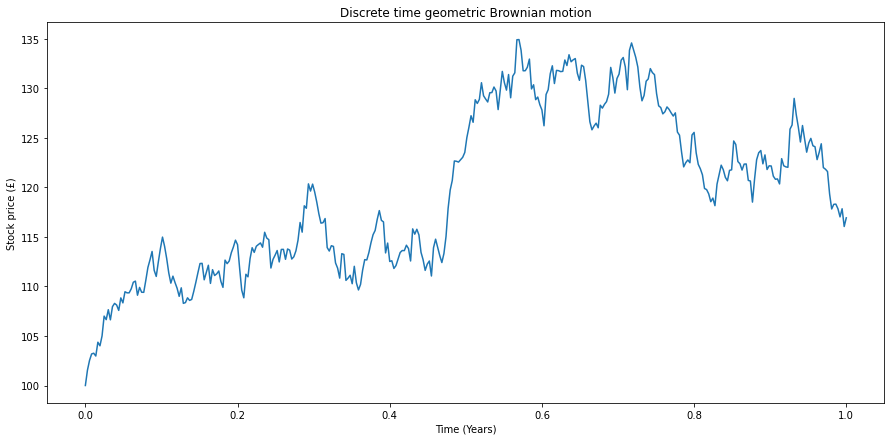

In [3]:
n_steps = 365 # Days in a year.
T = 1  # 1 year.
sigma = 0.2 # 20% volatility per year.
mu = 0.07   # 7% growth per annum.
S0 = 100  # Initial Stock Price.

times = np.linspace(0,1,n_steps+1)
S = simulate_gbm(S0,mu,sigma,T,n_steps)
ax = plt.gca()
ax.plot(times,S)
ax.set_xlabel('Time (Years)')
ax.set_ylabel('Stock price (£)')
ax.set_title('Discrete time geometric Brownian motion');

In [4]:
def simulate_gbm_paths( S0, mu, sigma, T, n_steps, n_paths):
    """
    Simulate discrete time geometric Brownian motion paths. Returns a matrix of stock price paths. Each row in the matrix is 
    a different path and each column represents a different time point like a plot: time goes horizontally, different paths
    are aligned vertically.
    """
    Z = np.zeros( [ n_paths, n_steps+1] )  # Matrix of (n_paths X n_steps+1).
    dt = T/n_steps
    Z[:,0] = np.log(S0)  # First column.
    times = np.linspace(0,T,n_steps+1)
    
    epsilon = np.random.randn( n_paths, n_steps )
    for i in range(0,n_steps):
        Z[:,i+1] = Z[:,i] + (mu-0.5*sigma**2) * dt + sigma*np.sqrt(dt)*epsilon[:,i]
        
    S = np.exp(Z)
    return S, times

### Fan Diagram
At each time we compute the median, $5^{th}$ and $95^{th}$ percentiles of the stock price and plot those together with a sample stock price path. [$n^{th}$ percentile is a value below which n% of observations in a group of observations falls.]

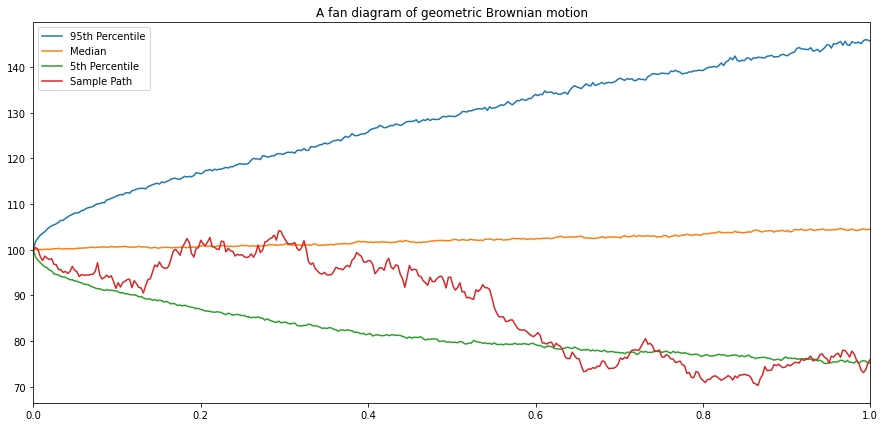

In [5]:
S, times = simulate_gbm_paths(S0,mu,sigma,T,n_steps,2000)
top_five_percent = np.percentile(S,95,0)
bottom_five_percent = np.percentile(S,5,0)
median = np.percentile(S,50,0)
plt.plot(times, top_five_percent, label='95th Percentile')
plt.plot(times,median, label='Median')
plt.plot(times, bottom_five_percent, label='5th Percentile')
plt.plot(times,S[0,:], label='Sample Path');
plt.xlim(0,1);
plt.title('A fan diagram of geometric Brownian motion')
plt.legend();

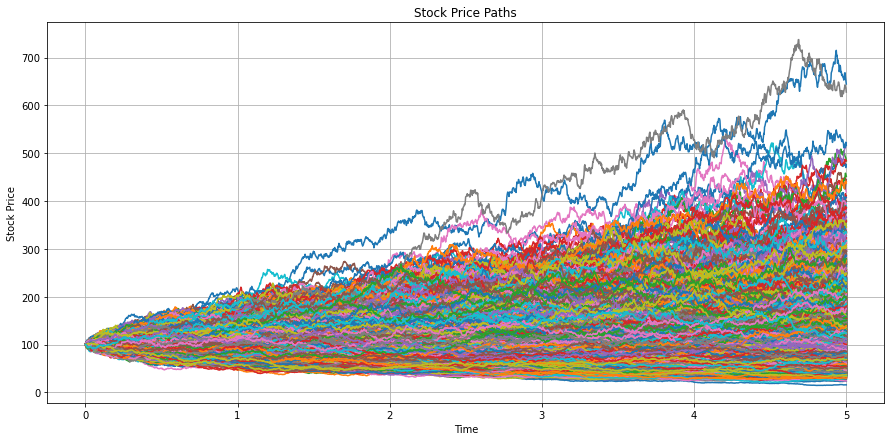

In [6]:
import seaborn as sns
n_steps = 1825 # Days in 5 year.
T = 5  # 5 year.
sigma = 0.2 # 20% volatility per year.
mu = 0.03   # 3% growth per annum.
S0 = 100  # Initial Stock Price.
S, times = simulate_gbm_paths(S0,mu,sigma,T,n_steps,10000)  # 10000 simulations.

# Plotting 10000 simulations.
for path in S:
    plt.plot(times, path)  # Plot each path.

plt.xlabel('Time')  # Label for x-axis.
plt.ylabel('Stock Price')  # Label for y-axis.
plt.title('Stock Price Paths')  # Title of the plot.
plt.grid(True)  
plt.show()  

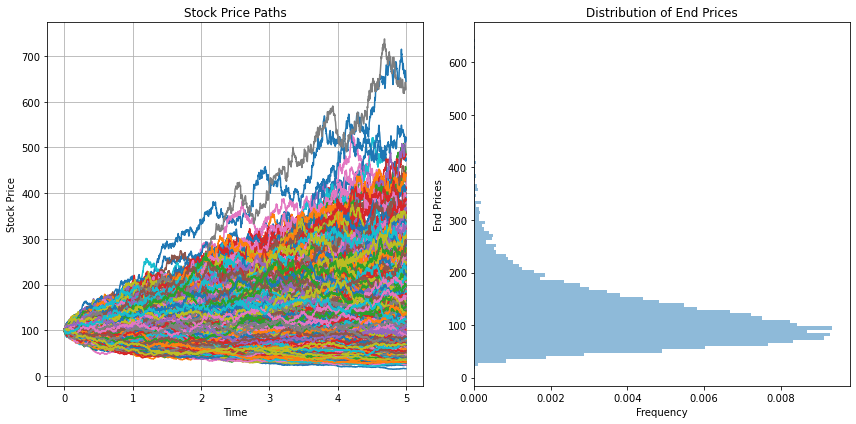

In [7]:
# Calculate end prices (prices at the last time point).
end_prices = S[:, -1]  # Last column contains end prices for each path.

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting stock price paths on the left subplot.
for path in S:
    axs[0].plot(times, path)

axs[0].set_xlabel('Time')
axs[0].set_ylabel('Stock Price')
axs[0].set_title('Stock Price Paths')
axs[0].grid(True)

# Plotting distribution of end prices on the right subplot.
axs[1].hist(end_prices, bins=100, orientation='horizontal', density=True, alpha=0.5)
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('End Prices')
axs[1].set_title('Distribution of End Prices')

plt.tight_layout()
plt.show()

If $S_t$ follows discrete time geometric Brownian motion with drift $\mu$ and volatility $\sigma$, Then the Expected value of $S_t$ satisfies

$$E(S_t)=S_0 e^{\mu t}$$ and the standard deviation of $S_t$ satisfies

$$\text{s.d.}(S_t)=S_0 e^{\mu t} \sqrt{e^{\sigma^2 t}-1}$$ Lets verify this numerically.

In [26]:
mu = 0.03
sigma = 0.15
T = 2  # 2 years.
n_paths = 10000
S0 = 1
S, times = simulate_gbm_paths(S0,mu,sigma,T,1,n_paths)
ST = S[:,-1]  # Last column.

expected_mean = S0 * np.exp(mu*T)
expected_std = S0 * np.exp(mu*T)* np.sqrt( np.exp(sigma**2 * T) - 1)
print(expected_mean,np.mean(ST),expected_std,np.std(ST))
assert abs((np.mean(ST)-expected_mean)/expected_mean) < 0.05
assert abs((np.std(ST)-expected_std)/expected_std) < 0.05

1.0618365465453596 1.0621534203117673 0.227807522114646 0.23050620996410787
